#### Sanjana Kotecha - skotecha - Homework 2

<b>1. Data Preperation </b>

We used the below techniques to addess this
1. Check NULL values
2. Find Outliers and replace with central Tendency
3. Feature Scaling using Standardization

<b>2. Exploratory Data Analysis </b>

<b>a. RAM:</b>As we can see in the below graph that the ram clearly seems to be affecting the price range.
Price Range 0 - Ram speed of around 500
Price Range 1 - Ram speed between 1000 and 2000
Price Range 2 - Ram speed between 2000 and 3000
Price Range 3 - Ram speed of around 4000

<b>b. Talktime:</b>As we can see the variance in the price range wrt to the talk time in the below graph but we can also see that the change is not very evident. Hence talktime could be one of the factors affecting but not a major one

<b>c. ClockSpeed:</b>As we can see the variance in the price range wrt to the clock speed in the below graph but we can also see that the change is not very evident also it seems to be negative. Hence clock-speed could be one of the factors affecting but not a major one

<b>d. Dual Sim:</b>As we can see the variance in the price range wrt to the existance or non-existance of dual sim in the below graph but we can also see that the change is not very evident. Hence dual-sim could be one of the factors affecting but not a major one

<b>3. Correlation Matrix</b>

<b>b.</b>The correlation matrix tells the correlation between each and everfy feature. That is the extent to which the existance of one feature affects/depends on another feature. 

<b>c.</b>Correlations can be both positive and negative.

<b>Negative correlation</b> - Increase in the value of one feature decreases the value of the target variable that is they are oppositely correlated
Eg: We can see that the mobile weight and price range are negatively correlated. That is as the weight of the mobile increases the price reduces

<b>Positive corelation</b> - Increase in the value of one feature increases the value of the target variable 
Eg: We can see that the ram and price range are positively correlated. That is as the ram of the mobile increases the price increases as well

<b>4. Build Model</b>

1. In the initial step we define the features and the targets in the training data 
2. In the next step we standardize the test data so that we can map it to the training data
3. Apply the various classification models and predict the the accuracy of each of the models depending on the data
4. Comparing the models depending on their
5. Visualizing the classification accuracy using the confusion matrix

<b>5. Compare Models</b>

the accuracy of each of the models can be listed as follows

<b>Random Forest:</b>100

<b>Logistc Regression:</b>85.45

<b>K-Nearest Neighbor:</b>70.95

<b>SVM:</b>87

<b>Decision Tree:</b>100

As we can see from the above received accuracy the Decision Trees and Random Forests provided us with the maximum accuracy.

Let us compare the random forest vs SVM

<b> Random Forest vs SVM </b>

As we can wee in our scenario Random Forest provided us with better training accuracy. It was 100% where as running an SVM on this training data gave us the accuracy of only 87%. SVM ideally is abetter option when the data is free from outliers and most importantly when the data needs to be classified in 2 classes. In such a scenario using a Random forest would be an expensive technique. However, when we have more than 2 classes like in our scenario we have 4 classes also a few outliers which were later cleaned we use Random Forest as it can give us better training accuracy than the SVM

<b>6. Bonus Question</b>

1. Used Confusion Matrix to compare the models highlighting the true positives in each class
2. Plotted a count plot for output of the model for each of the class (represented in different colors)

In [126]:
'''
--------------------------------------------
Reading the data from csv file to Dataframes
--------------------------------------------
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.tree import *
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


def read_data(filename):
    return pd.read_csv(filename)
#     return df
    #print(df.iloc[:,:-1])
    
train_file = r"C:\Users\Sanjana\Downloads\mobile-price-classification\train.csv"
df1 = read_data(train_file)
test_file = r"C:\Users\Sanjana\Downloads\mobile-price-classification\test.csv"
test_df = read_data(test_file)


In [127]:
# Print to check the way the values have been stored in the dataframe
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### Data Preprocessing
In this stage we use the below various methods to clean the data and preprocess it

In [128]:
#CHECK NULL VALUES 
#check if the data frame has any null values and if they need to be cleaned
df1.isnull().values.any()  

False

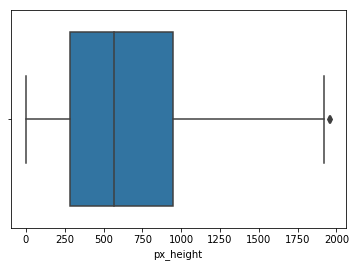

In [129]:
#as we can see in the above scenario that we don't have any null values hence we don't need to handle these
#CHECK OUTLIERS USING INTERQUARTILE RANGE 
#use boxplots to find outliers only on non boolean columns
sns.boxplot(df1.px_height)

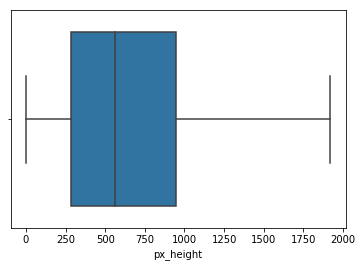

In [130]:
#as we can see in the above box plot that there is an outlier in the given data. 
#In this scenario we replace the value with the central tendancy in our case we take it as median
Q1 = df1["px_height"].quantile(0.25)
Q3 = df1["px_height"].quantile(0.75)
IQR = Q3 - Q1
median_val = df1["px_height"].median()
df1.loc[(((Q1 - 1.5 * IQR) >= df1.px_height) | (df1.px_height >= (Q3 + 1.5 * IQR))), 'px_height'] = median_val
#use boxplots to find if the outliers still exist
sns.boxplot(df1.px_height)

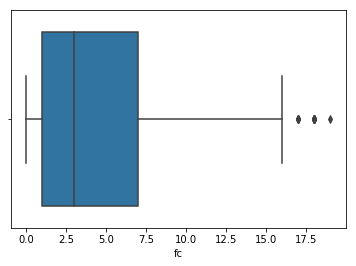

In [131]:
#Repeat the same step of using boxplots to find outliers only on non boolean columns
sns.boxplot(df1.fc)

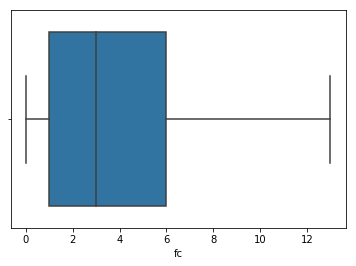

In [132]:
#Repeat the same for outliers in the Front Camera Feature
temp_IQR = 1000000000
while(True):
    Q1 = df1["fc"].quantile(0.25)
    Q3 = df1["fc"].quantile(0.75)
    IQR = Q3 - Q1
    median_val = df1["fc"].median()
    df1.loc[(((Q1 - 1.5 * IQR) >= df1.fc) | (df1.fc >= (Q3 + 1.5 * IQR))), 'fc'] = median_val
    if(temp_IQR==IQR):
        break
    else:
        temp_IQR = IQR
#use boxplots to find if the outliers still exist
sns.boxplot(df1.fc)

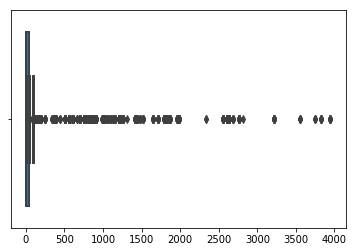

In [133]:
#Let us now check if the features are in the same scale to ease the comparision
#For this we use a box plot to find outliers across all the features
for i in range (len(df1.columns)):
    sns.boxplot(df1.loc[:i])

In [134]:
# As we can see above that all the features belong to various scales we perform feature scaling
# This method is called standardization and it can be performed using various techniques like binning, z-score etc
x = df1.iloc[:,:-1]
# Standardizing similar to calculating z score
std_scale = preprocessing.StandardScaler().fit_transform(x)
print(std_scale)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


In [135]:
# Copy the numpy to the feature scaled dataframe
df2 = df1.copy()
df2.loc[:,:-1] = std_scale

In [136]:
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.765903,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.411960,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-1.042103,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.591487,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.489703,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.401921,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-1.042103,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.295523,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.548499,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.277413,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1


#### Exploratory Data Analysis
In the exploratory data analysis we check the price range variance for each feature

'\nAs we can see in the below graph that the ram clearly seems to be affecting the price range.\nPrice Range 0 - Ram speed of around 500\nPrice Range 1 - Ram speed between 1000 and 2000\nPrice Range 2 - Ram speed between 2000 and 3000\nPrice Range 3 - Ram speed of around 4000\n'

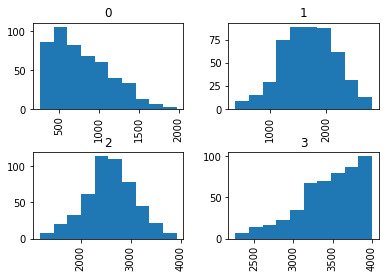

In [137]:
#Check the variance of price range depending on the ram
df1.hist('ram','price_range')
'''
As we can see in the below graph that the ram clearly seems to be affecting the price range.
Price Range 0 - Ram speed of around 500
Price Range 1 - Ram speed between 1000 and 2000
Price Range 2 - Ram speed between 2000 and 3000
Price Range 3 - Ram speed of around 4000
'''

'\nAs we can see the variance in the price range wrt to the talk time in the below \ngraph but we can also see that the change is not very evident. Hence talktime could be \none of the factors affecting but not a major one\n'

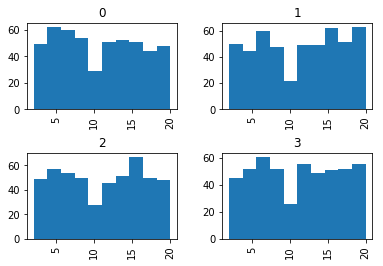

In [138]:
#Check the variance of price range depending on the talk time
df1.hist('talk_time','price_range')
'''
As we can see the variance in the price range wrt to the talk time in the below 
graph but we can also see that the change is not very evident. Hence talktime could be 
one of the factors affecting but not a major one
'''

'\nAs we can see the variance in the price range wrt to the clock speed in the below \ngraph but we can also see that the change is not very evident also it seems to be negative. Hence clock-speed could be \none of the factors affecting but not a major one\n'

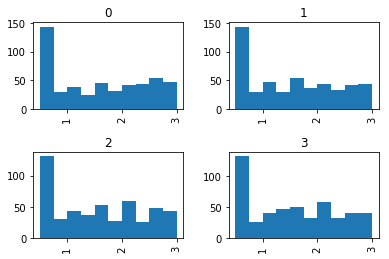

In [139]:
#Check the variance of price range depending on the clock speed
df1.hist('clock_speed','price_range')
'''
As we can see the variance in the price range wrt to the clock speed in the below 
graph but we can also see that the change is not very evident also it seems to be negative. Hence clock-speed could be 
one of the factors affecting but not a major one
'''

'\nAs we can see the variance in the price range wrt to the existance or non-existance of dual sim\nin the below graph but we can also see that the change is not very evident. Hence dual-sim could be \none of the factors affecting but not a major one\n'

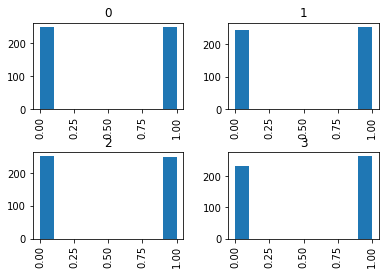

In [140]:
#Check the variance of price range depending on the clock speed
df1.hist('dual_sim','price_range')
'''
As we can see the variance in the price range wrt to the existance or non-existance of dual sim
in the below graph but we can also see that the change is not very evident. Hence dual-sim could be 
one of the factors affecting but not a major one
'''

#### Correlation Matrix

Below is the correlation matrix depending on the entire training set

The correlation matrix tells the correlation between each and everfy feature. That is the extent to which the existance of one feature affects/depends on another feature. 

Correlations can be both positive and negative.

<b>Negative correlation</b> - Increase in the value of one feature decreases the value of the target variable that is they are oppositely correlated
Eg: We can see that the mobile weight and price range are negatively correlated. That is as the weight of the mobile increases the price reduces

<b>Positive corelation</b> - Increase in the value of one feature increases the value of the target variable 
Eg: We can see that the ram and price range are positively correlated. That is as the ram of the mobile increases the price increases as well


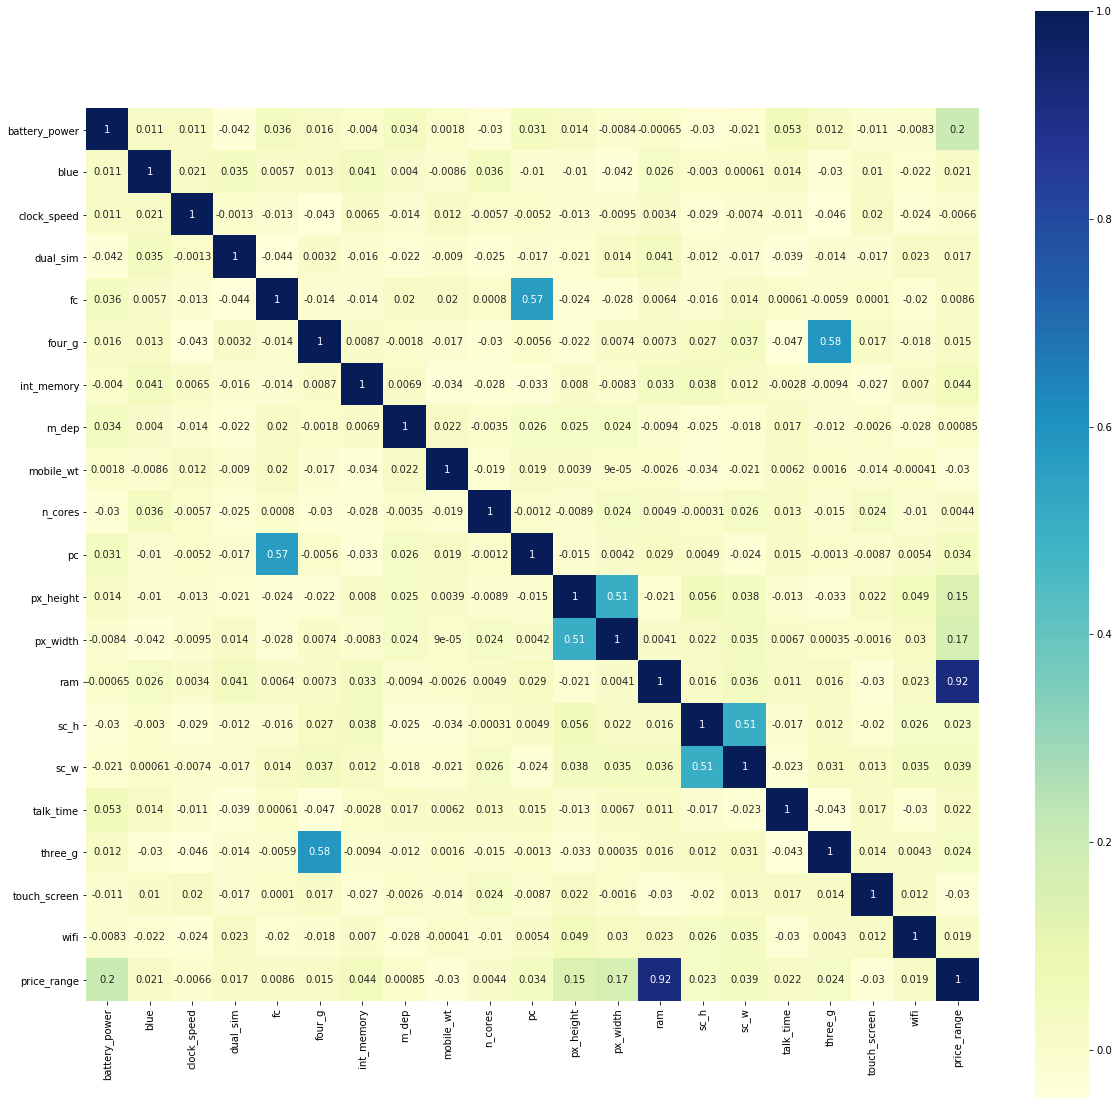

In [141]:
correlation_matrix = df2.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", square=True, ax=ax)
#correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(1)

#### Building a model

1. In the initial step we define the features and the targets in the training data 
2. In the next step we standardize the test data so that we can map it to the training data
3. Apply the various classification models and predict the the accuracy of each of the models depending on the data
4. Comparing the models depending on their
5. Visualizing the classification accuracy using the confusion matrix

In [142]:
# Step 1: In the initial step we define the features and the targets in the training data 
feature_train = df2.iloc[:,:-1]
target_train = df2.price_range
feature_test = test_df.drop("id",axis=1).copy()
# Step 2: In the next step we standardize the test data so that we can map it to the training data
std_scale_test = preprocessing.StandardScaler().fit_transform(feature_test)
feature_test.iloc[:] = std_scale_test

In [143]:
feature_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097


In [144]:
# Step 3: Apply the various classification models and predict the the accuracy of each of the models depending on the data
'''
----------------------------------------
RANDOM FOREST CLASSIFICATION MODEL
----------------------------------------
'''

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(feature_train,target_train)

rand_predicted = rand_forest.predict(feature_test)

rand_forest_score = round(rand_forest.score(feature_train,target_train)*100,2)
print(rand_forest_score)

100.0


In [145]:
'''
----------------------------------------
LOGISTIC REGRESSION CLASSIFICATION MODEL
----------------------------------------
'''
log_regression = LogisticRegression()
log_regression.fit(feature_train,target_train)

log_predicted = log_regression.predict(feature_test)

log_reg_score = round(log_regression.score(feature_train,target_train)*100,2)
print(log_reg_score)

85.45


In [146]:
'''
----------------------------------------
K-NEAREST NEIGHBOR CLASSIFICATION MODEL
----------------------------------------
'''
knn_model = KNeighborsClassifier()
knn_model.fit(feature_train,target_train)

knn_predicted = knn_model.predict(feature_test)

knn_score = round(knn_model.score(feature_train,target_train)*100,2)
print(knn_score)

70.95


In [147]:
'''
----------------------------------------
SUPPORT VECTOR MACHINE CLASSIFICATION MODEL
----------------------------------------
'''
svm_model = LinearSVC()
svm_model.fit(feature_train,target_train)

svm_predicted = svm_model.predict(feature_test)

svm_score = round(svm_model.score(feature_train,target_train)*100,2)
print(svm_score)

87.0


In [148]:
'''
----------------------------------------
DECISON TREE CLASSIFICATION MODEL
----------------------------------------
'''
decision_tree = DecisionTreeClassifier()
decision_tree.fit(feature_train,target_train)

decision_tree_predicted = decision_tree.predict(feature_test)

decision_tree_score = round(decision_tree.score(feature_train,target_train)*100,2)
print(decision_tree_score)

100.0


As we can see above the accuracy of each of the models can be listed as follows

<b>Random Forest:</b>100

<b>Logistc Regression:</b>85.45

<b>K-Nearest Neighbor:</b>70.95

<b>SVM:</b>87

<b>Decision Tree:</b>100

As we can see from the above received accuracy the Decision Trees and Random Forests provided us with the maximum accuracy.

Let us compare the random forest vs SVM

<b> Random Forest vs SVM </b>

As we can wee in our scenario Random Forest provided us with better training accuracy. It was 100% where as running an SVM on this training data gave us the accuracy of only 87%. SVM ideally is abetter option when the data is free from outliers and most importantly when the data needs to be classified in 2 classes. In such a scenario using a Random forest would be an expensive technique. However, when we have more than 2 classes like in our scenario we have 4 classes also a few outliers which were later cleaned we use Random Forest as it can give us better training accuracy than the SVM

#### Below is the visulaization of the accuracy using the confusion Matrix

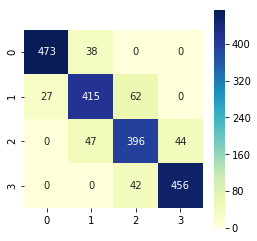

In [149]:
'''
----------------------------------------
Random Forest Confusion Matrix
----------------------------------------
'''
rf_predict = cross_val_predict(rand_forest,feature_train,target_train, cv=3)
cm_rf = confusion_matrix(rf_predict,target_train) 
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_rf, annot=True, cmap="YlGnBu", square=True, ax=ax, fmt='g')

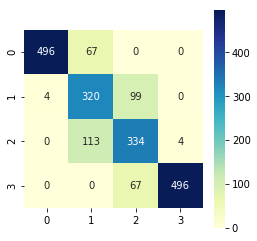

In [150]:
'''
----------------------------------------
Logistic Regression Confusion Matrix
----------------------------------------
'''
lr_predict = cross_val_predict(log_regression,feature_train,target_train, cv=3)
cm_lr = confusion_matrix(lr_predict,target_train)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_lr, annot=True, cmap="YlGnBu", square=True, ax=ax, fmt='g')

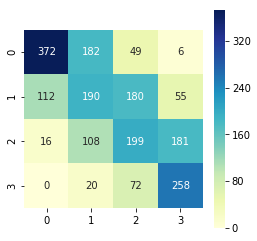

In [151]:
'''
----------------------------------------
K-Nearest Neighbor Confusion Matrix
----------------------------------------
'''
knn_predict = cross_val_predict(knn_model,feature_train,target_train, cv=3)
cm_knn = confusion_matrix(knn_predict,target_train)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_knn, annot=True, cmap="YlGnBu", square=True, ax=ax, fmt='g')

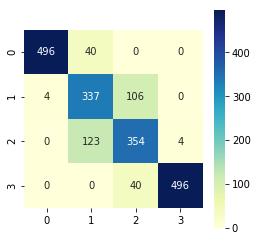

In [152]:
'''
----------------------------------------
SVM Confusion Matrix
----------------------------------------
'''
svm_predict = cross_val_predict(svm_model,feature_train,target_train, cv=3)
cm_svm = confusion_matrix(svm_predict,target_train)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_svm, annot=True, cmap="YlGnBu", square=True, ax=ax, fmt='g')

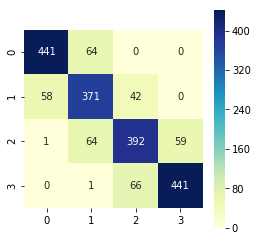

In [153]:
'''
----------------------------------------
Decision Tree Confusion Matrix
----------------------------------------
'''
dt_predict = cross_val_predict(decision_tree,feature_train,target_train, cv=3)
cm_dt = confusion_matrix(dt_predict,target_train)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_dt, annot=True, cmap="YlGnBu", square=True, ax=ax, fmt='g')

#### Below is the count of prediction for each class by different models

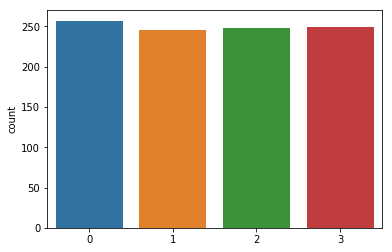

In [154]:
'''
----------------------------------------
Random Forest
----------------------------------------
'''
sns.countplot(rand_predicted)

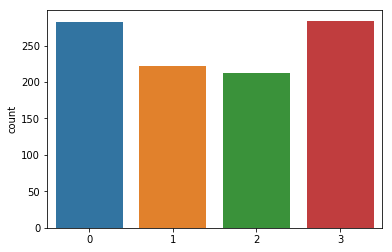

In [155]:
'''
----------------------------------------
Logistic Regression
----------------------------------------
'''
sns.countplot(log_predicted)

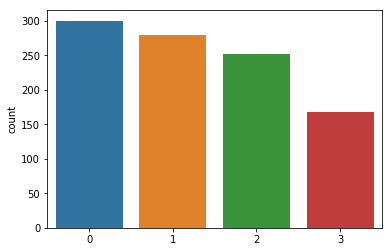

In [156]:
'''
----------------------------------------
K-Nearest Neighbors
----------------------------------------
'''
sns.countplot(knn_predicted)

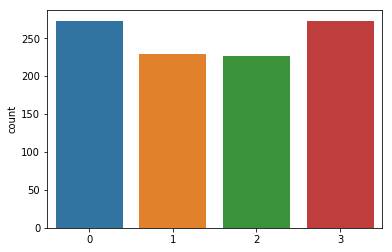

In [157]:
'''
----------------------------------------
Support Vector Machine
----------------------------------------
'''
sns.countplot(svm_predicted)

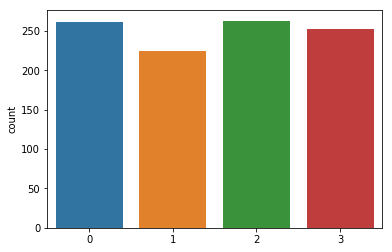

In [158]:
'''
----------------------------------------
Decision Tree 
----------------------------------------
'''
sns.countplot(decision_tree_predicted)